In [35]:
import time
import board
import busio
import pandas as pd
from pandas import DataFrame
from matplotlib import pylab
import matplotlib.pyplot as plt
from pylab import *
import pylab
import numpy as np
import matplotlib.colors as clrs
import matplotlib.cm as cm
import matplotlib
from collections import deque
#matplotlib.use('TkAgg')
#%matplotlib notebook

#import time
import sys
import sqlite3
#from time import sleep

#import adafruit_ads1x15.ads1015 as ADS
import adafruit_ads1x15.ads1115 as ADS
from adafruit_ads1x15.analog_in import AnalogIn

import MySQLdb as db

HOST = "10.208.8.122"
PORT = 3306
USER = "yogi"
PASSWORD = "bittoo"
DB = "TemaccessToRemoteRp2"
'''
try:
    connection = db.Connection(host=HOST, port=PORT,
                               user=USER, passwd=PASSWORD, db=DB)

    c = connection.cursor()
    c.execute("SELECT * from temSensor")
    result = c.fetchall()
    for item in result:
        print (item)

except Exception as e:
    print (e)
'''
connectionL = db.connect(host="10.208.8.121",
                     user="yogi",
                     passwd="bittoo",
                     db="allSensors")

#c = conn.cursor()
connectionR = db.Connection(host=HOST, port=PORT,user=USER, passwd=PASSWORD, db=DB)

cR = connectionR.cursor()
cL =connectionL.cursor()

i2c = busio.I2C(board.SCL, board.SDA)

# Create the ADC object using the I2C bus
ads = ADS.ADS1115(i2c)

ads.gain = 1


cL.execute('DROP TABLE IF EXISTS flowReadings;')
print ('table deleted')


cL.execute('CREATE TABLE flowReadings(id INT AUTO_INCREMENT PRIMARY KEY, ts TIMESTAMP DEFAULT CURRENT_TIMESTAMP, flowHP FLOAT, flowLoad FLOAT);')



lol=[[], [], []]
flowRateLoad  = []

def flatten(l_of_l):
    T = l_of_l[0]
    flattend_l = [val for sublist in T for val in sublist]
    #print ('flattened list is =', flattend_l)
    return flattend_l

def mct(Lol):
    mHP = Lol[2]
    T = flatten(Lol)
    mL = Lol[1]
    #this is density as polynomial function of T
    p_LperH = [999.8473664794213 + 6.29265190e-02*x[2] - 8.42930922e-03*x[2]**2 + 6.77190849e-05*x[2]**3 \
 - 4.40840180e-07*x[2]**4 + 1.29302849e-09*x[2]**5 for x in T  ]

    #pV = [(999.8473664794213 + 6.29265190e-02*x[2] - 8.42930922e-03*x[2]**2 + 6.77190849e-05*x[2]**3 - 4.40840180e-07*x[2]**4 + 1.29302849e-09*x[2]**5)*2.7777e-07*y for x, y in zip(T, mHP)  ]
    # this is mass flow  in kg/S =  density*V(flow rate in m^3/sec)= d * (1000^-3/3600)
    mF_kgPerS =[ x*2.7777e-07*y for x, y in zip(p_LperH, mHP)]
    #this is Cp as functiono of T linear function
    cP_kjPerkgK = [4.253264761904763 - 0.00470305*b[2] for b in T]
    #mCT1 = sum([(4.253264761904763 - 0.00470305*b[2])*a*(b[2]-b[3]) for a, b in zip(mHP, T)])
    #mCT_kW = [(4.253264761904763 - 0.00470305*b[2])*a*(b[3]-b[4]) for a, b in zip(mHP, T)]
    #Cp*M*deltaT
    mCT_kW = [c*a*(b[3]-b[4]) for c, a, b in zip(cP_kjPerkgK,mF_kgPerS, T)]
    # sum(mct* 5/3600 (time stamp))  = kWh
    mCT2_kWh = sum([m*c*(dt[3]-dt[4])*0.0013888889 for m, c, dt in zip(mF_kgPerS,  cP_kjPerkgK, T)])
    #print (T[-1], mHP,'mCpDeltaT =', mCT)
    #print ('mCT is:',mCT)
    #print ('mF', mF_kgPerS, mHP[-1])
    #print (' mCT_kW is:', mCT_kW)
    #print ('mCTkWh is ',mCT2_kWh)
    return mCT_kW, mCT2_kWh

l_id = []

def idGenerator(Id, l_id):
    if Id not in l_id:
       l_id.append(Id) 
    #print (l_id)
    return l_id

#df_conc= None
def dfs(Lol):
    mHP = Lol[2]
    T = flatten(Lol)
    mL = Lol[1]
    StartTemTestingtank = [ 'id', 'dateTime', 'Tamb', 'TtopTestTankHPCir', 'TbottomTestTankHpCir', 'TtopSourceTank', \
'TloadTankMid','TTopTestTankLoadCir', 'TloadMix', 'TbottomSourceTank', 'TbottomTestTankLoadCir']
    l_T = ['T{}'.format(x) for x in range(0,10)]
    L = StartTemTestingtank +l_T
    df_mHP = DataFrame(mHP, columns=['flowHP'])
    df_mL = DataFrame(mL, columns=['flowLoad'])
    df_tem = DataFrame(T, columns = L)
    df_conc = pd.concat([df_tem, df_mHP, df_mL], axis=1)
    #print (df_mL)
    #print (df_mHP)
    #print (df_tem)
    #print (df_conc)
    return df_conc

def tankStrat(df):
    dfT = df.iloc[:, 11:-2]
    #print (dfT)
    return dfT
#tankStratTem = tankStrat(df_conc)


def create_color_step_obj(cmap_name, n):
    """
    Return scalarMap object with n colors in gradient from color map
    given in cmap_name.
    """
    cmap = plt.get_cmap(cmap_name)
    values = range(n)
    cNorm  = clrs.Normalize(vmin=values[0], vmax=values[-1])
    scalarMap = cm.ScalarMappable(norm=cNorm, cmap=cmap)
    return scalarMap



table deleted
Loop 1
Loop 1
Loop 1
Loop 1
Loop 1
Loop 1
Loop 1
Loop 1
Loop 1
Loop 1
Loop 1


small x is: 230
small y is : 0    20
1    51
2    24
3    55
4    59
5    39
6    43
7    33
8    21
9    52
Name: 99, dtype: int32
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
0 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9343
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.6329
Name: 0, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
0 T0    24.4490
T1    23.5698
T2    22.4880
T3    21.8120
T4    21.2038
T5    27.9343
T6    27.9004
T7    27.3588
T8    26.4788
T9    25.6329
Name: 0, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
fl

flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6340193487350078 0.003971308166207377 -0.4637337145910134
2 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9343
T6    27.9004
T7    27.3927
T8    26.5127
T9    25.6329
Name: 2, dtype: float64
________________________________________________________________
flow rates load is =  0.6340193487350078 0.0039770376912244875 1.3231252342444757
flow rates HP is =  0.6300192266609699 0.003946252594180832 -5.187740468238238
2 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7782
T4    21.1700
T5    27.9343
T6    27.9004
T7    27.3927
T8    26.5127
T9    25.6329
Name: 2, dtype: float64
________________________________________________________________
flow rates load is =  0.6300192266609699 0.003951945970775122 -0.25497039150178974
flow rates HP is =  0.6360194097720268 0.003983835952220649 1.898269662232681
2 T0    24.4152
T1    23.5698
T2    22.4880
T3    21.7

KeyboardInterrupt: 

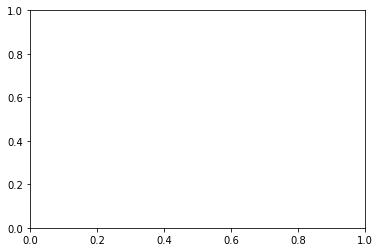

In [36]:
#This works plots interactivly but index dosent changes. So i need to yield the x and y values from generators
#wghen yielding, x and y, its yielding redundant values of x and y, because the wjole list is again a nd agin
#getting yielde in while loop. I need to yield not from list but directly from Mysql perhaps
def plotObject(df,alpha =0.7):

    #plt.ion()
    #fig, ax = plt.ion()
    #ax.set_xlabel('Index')
    #ax.set_ylabel('Tem, C', color='r')
    #plt.legend (bbox_to_anchor=(1.4,0.89), fontsize='xx-small', loc='upper right', ncol=2)
    for i in range (0, 10):
        x = df.index[-1]
        y =df.iloc[-1]
        #print ('dataframe is :',df)
        Fig = ax.plot(x, y.iloc[i], label = 'Layer ' + str(10-i), color= scm.to_rgba(10-i, alpha))
    #plt.show()
    #plt.draw()
    #plt.pause(0.05)
    return Fig

#tankStrat(dfs(lol))
cmap_name = "jet"
scm = create_color_step_obj(cmap_name, 10)
#plt.ion()
#fig, ax = plt.subplots()
#plt.legend (bbox_to_anchor=(1.4,0.89), fontsize='xx-small', loc='upper right', ncol=2)
#plt.draw()
#plt.pause(0.05)
#x = np.random.random()
x = 230
#x = pd.DataFrame(np.zeros(1))
print ('small x is:',x)
y = pd.DataFrame(np.random.randint(20,60,size=(100, 10))).iloc[-1]
#y = pd.DataFrame(np.Nan(0,100,size=(100, 10))).iloc[-1]
#y = pd.DataFrame([0]*10)
print ('small y is :', y)
#fig = [plt.plot(x, y.iloc[i], label = 'Layer ' + str(10-i), color= scm.to_rgba(10-i, 0.7)) for i in range (0,10)]
#plt.figure(figsize=(10,8))
plt.ion()
#plt.figure()
#plt.ion()
fig = plt.figure()
axes = fig.add_subplot(111)
#plt.axis([0,1000,0,1])
x = x

'''
for i in range(0, 10):
    Y = y.iloc[i]
    
    #Y = y.iloc[i]
    line_list = [plt.scatter(x, Y, label = 'Layer ' + str(10-i), color= scm.to_rgba(10-i, 0.7)) for i in range (0, 10)]
    #plt.ion()
    plt.draw()
    #time.sleep(0.1)
    plt.pause(0.0001)  
    plt.show()
    ##plt.pause(0.01)
'''
def plotInnerFig(figs, df):
    for fi in figs:
        fi.set_ydata(df)
        plt.draw()
        plt.pause(0.5)
        plt.show()
    return 

def plot(df, fig):
    x = df.index
    y = df
    Fig = [fi.set_ydata(df) for fi in fig]
        
    plt.draw()
    plt.pause(0.5)
    plt.show()
    return Fig

import threading
import time
def whileLoopMain():
    while True:
        #c.execute("INSERT INTO flowReadings(flowHp, flowLoad) VALUES(?,?,?,?)", (chan2.voltage, chan1.voltage))
        #connection.commit()
        chan1 = AnalogIn(ads, ADS.P0)
        chan2 = AnalogIn(ads, ADS.P1)

        chan1Vol = chan1.voltage
        chan1curr = chan1Vol/159.42

        chan2Vol = chan2.voltage
        chan2curr=chan2Vol/159.65
        #flow1 = ((chan1Vol/159.42)*1000 -4)/16*1000
        flow1 = ((chan1Vol/159.42)-0.003956)/0.0000159
        #flow2 = ((chan2Vol/159.65)*1000 -4)/16*4000 +20
        #flow2 = ((chan2Vol/159.65)- 0.0005468893873066417)/1.09561608e-05
        flow2 = ((chan2Vol/159.65)- 0.003973767754877122)/5.3038815e-06
        cL.execute("INSERT INTO flowReadings(flowHp, flowLoad) VALUES(%s, %s)", (flow2, flow1))
        connectionL.commit()
        #print('flow HP:',"{:>5}\t{:>5.3f}".format(chan2.value, chan2.voltage), '\n\n')
        #print('flow load:',"{:>5}\t{:>5.3f}".format(chan1.value, chan1.voltage, '\n\n'))
        print('flow rates load is = ',chan1Vol, chan1curr,flow1 )
        print('flow rates HP is = ',chan2Vol, chan2curr,flow2 )

        connectionR = db.Connection(host=HOST, port=PORT,user=USER, passwd=PASSWORD, db=DB)
        cR = connectionR.cursor()
        #c.execute("SELECT * from temSensor")
        cR.execute("SELECT * FROM temSensor ORDER BY id DESC LIMIT 1")
        result = cR.fetchall()
        id = result[0][0]
        idGenerator(id, l_id)
        #print ('id is :', id)
        flowRateLoad.append(flow1)

        if lol[0] ==[] or id < lol[0][-1][0][0] :
            lol[0].append(result)
            #print (lol)
            lol[1].append(flow1)
            lol[2].append(flow2)
        elif lol[0] != [] and id > lol[0][-1][0][0]:

            lol[0].append(result)
            lol[1].append(flow1)
            lol[2].append(flow2)


        mct(lol)
        #print ('lol is:',lol)
        #dfs(lol)
        tankStrat(dfs(lol))
        #plot(tankStrat(dfs(lol)), plotObject(tankStrat(dfs(lol))))
        #plotObject(tankStrat(dfs(lol)))for i in range (0, 10):
        x = tankStrat(dfs(lol)).index[-1]
        y =tankStrat(dfs(lol)).iloc[-1]
        print (x, y)
        #yield x, y 
        '''
        for line in line_list:
            print (type(line), line)
            for li in line:
                li.set_xdata(x)
                li.set_ydata(y)
        axes.autoscale_view(True,True,True)
        '''
        '''
        for line in line_list:
            line.set_xdata(x)
            line.set_ydata(y)
        plt.show()
        plt.draw()
        plt.pause(0.0001)
        '''
        
        
        #plt.figure()
        #for f in fig:
        #    f.set_xdata(x)
        #    f.set_ydata(y)
        #plt.show()
        #plt.draw()
        #plt.pause(0.01)
        #print('x is ',x, 'y is:', y)
        #plt.draw()
        #plt.pause(0.05)
        #print ('dataframe is :',df)
    
    
    
        print('________________________________________________________________')
        time.sleep(0.10)
 

whileLoopMain()

'''
def infiniteloop1(h):
    while True:
        v = np.random.randint(2)
        h = h^2
        #h = -4.9*t**2 + 1
        #v = g*t
        #print (v)
        yield v, h

thread2 = threading.Thread(target= infiniteloop1(1))
thread2.start()
for v, h in infiniteloop1(1):
    print (h, v)
#X_value = infiniteloop1(1)
#data = next (X_value)
                           
thread2 = threading.Thread(target= whileLoopMain)
thread2.start()
for x, y in whileLoopMain():
    print (x, y)

'''
'''
data_out  = whileLoopMain()
#data = [next(data_out)]
while data_out:
    data = [next(data_out)]
    print (data)
    time.sleep(0.10)
#for X, Y in whileLoopMain():
#    print ('X is:',X, 'Y is :',Y)
'''